In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [52]:
df = pd.read_csv('1-studyhours.csv')

In [53]:
df.head()

,Study Hours,Exam Score
0,3.9,40.0
1,9.6,57.1
2,4.5,42.7
3,11.4,65.1
4,14.4,78.7


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Study Hours  33 non-null     float64
 1   Exam Score   33 non-null     float64
dtypes: float64(2)
memory usage: 660.0 bytes


In [55]:
df.describe()

,Study Hours,Exam Score
count,33.000000,33.000000
mean,15.772727,74.612121
std,7.608723,18.711206
min,3.000000,40.000000
25%,9.600000,58.500000
50%,17.400000,78.800000
75%,21.300000,90.800000
max,30.000000,100.000000


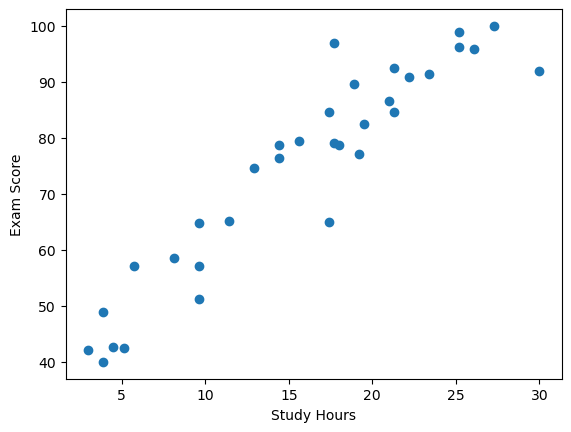

In [56]:
plt.scatter(df['Study Hours'],df['Exam Score'])
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.show()

In [57]:
# independent and dependent features
X=df[['Study Hours']]
#X için dataframe ister o yüzden iki köşeli parantez arasına yazmalıyız ama birden fazla girdi yazınca sıkıntı olmaz
y=df['Exam Score']
#Çıktı için series beklenir girdi için dataframe

In [58]:
#test - train split

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=15)

In [61]:
#standardize the data set

In [62]:
from sklearn.preprocessing import StandardScaler
#test ve train velerini küçültüp veya büyültüp z formulü ile standrt hale getirecek

In [63]:
df.head()

,Study Hours,Exam Score
0,3.9,40.0
1,9.6,57.1
2,4.5,42.7
3,11.4,65.1
4,14.4,78.7


In [64]:
# balanced feature values
# efficeient gradient descent 
# l1,l2

In [65]:
scaler = StandardScaler() #kolonlar arasındaki değer farklılıklarını gidermek için

In [66]:
X_train = scaler.fit_transform(X_train) #Eğitim verisinin ortalama ve std'sini öğrenip uygular
X_test = scaler.transform(X_test) #fit -> data leakage yani  testle ilgili bir şey bilmemesi gerekir o yzüden trasnform kllanırız

In [67]:
X_train

array([[ 0.11794385],
       [-0.97424848],
       [-1.68837424],
       [ 0.32798083],
       [ 0.36998823],
       [-0.7222041 ],
       [ 0.41199563],
       [-0.97424848],
       [ 0.11794385],
       [-0.30213013],
       [ 0.15995124],
       [ 0.66404001],
       [-0.13410054],
       [ 1.50418796],
       [-0.51216711],
       [ 0.15995124],
       [-0.30213013],
       [ 1.21013618],
       [ 1.33615837],
       [ 0.7900622 ],
       [-1.77238903],
       [-1.89841122],
       [ 0.20195864],
       [ 1.88225453],
       [-1.18428547],
       [ 1.21013618]])

In [68]:
X_test

array([[-1.60435944],
       [ 0.62203261],
       [ 0.95809179],
       [-1.52034465],
       [-0.97424848],
       [-1.77238903],
       [ 0.66404001]])

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
regression = LinearRegression()

In [71]:
regression.fit(X_train,y_train)

LinearRegression()

In [72]:
print("Coefficient: ",regression.coef_)
print("Intercept: ",regression.intercept_)

Coefficient:  [16.17860223]
Intercept:  76.9076923076923


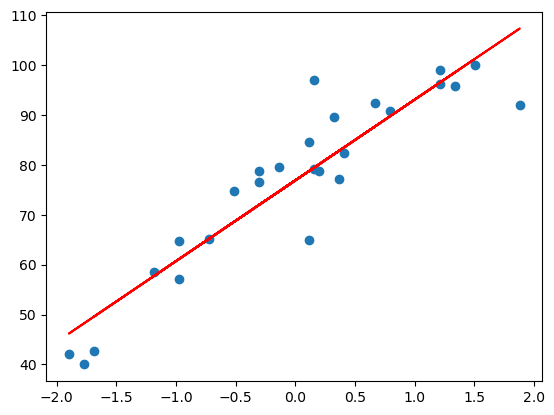

In [73]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),"r")
plt.show()

In [74]:
# 20 saat çalışan biri için

In [75]:
regression.predict([[20]])

array([400.47973694])

In [76]:
scaler.transform([[20]])

C:\Users\AlperKömpe\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.48200796]])

In [77]:
regression.predict(scaler.transform([[20]]))
#20 saaat çalışan 84 alır sonucu alırmış

C:\Users\AlperKömpe\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([84.70590731])

In [78]:
regression.predict(scaler.transform([[23]]))

C:\Users\AlperKömpe\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([91.50211702])

In [79]:
#outlierları çıkart

In [80]:
#mse ve mae,rmse arasındaki fark mea mutlak değeri alır aykırı değerlere göre daha dayanıklıdır

In [81]:
#tek bir regresyonun başarısını ölçeceksek adjusted r2 bakmak daha mantıklı

In [82]:
#Bazı modelleri birbiri ile kıyaslarken mse bakabiliriz

In [83]:
#prediction with test data

In [84]:
y_pred_test=regression.predict(X_test)

In [85]:
y_test

25    42.4
14    86.6
30    91.5
16    57.2
24    51.2
20    49.0
19    84.7
Name: Exam Score, dtype: float64

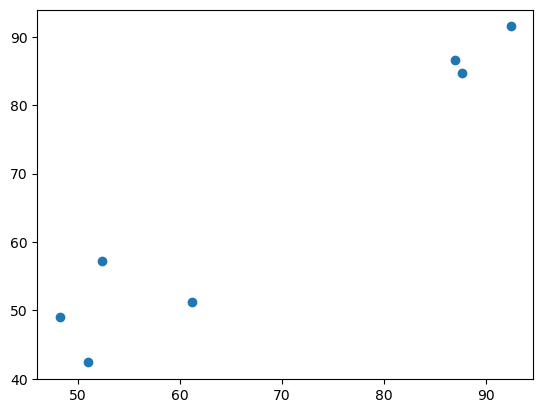

In [86]:
plt.scatter(y_pred_test,y_test)
plt.show()
#ne kadar doğrusal bir şey çıktıysa iyi mantıklı ilerliyorumdur

In [87]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [89]:
mse = mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print("mse: ",mse)
print("mae: ",mae)
print("rmse: ",rmse)

mse:  29.45839048833392
mae:  4.054868128856142
rmse:  5.427558427906043


In [90]:
r2=r2_score(y_test,y_pred_test)
print("r2 score:",r2)

r2 score: 0.9196596206825491
